<a href="https://colab.research.google.com/github/MerveSim/IAE_DATA4AUDITORS/blob/main/Projet_Jeu_Video_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip install yfinance
import yfinance as yf
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import shapiro, jarque_bera, norm,linregress
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Chargement des données
Actions = ["EA", "TTWO", "NTDOY"]
date_debut = "2015-01-01"
date_fin = "2025-01-01"

# Téléchargement des données historiques
donnees = yf.download(Actions, start=date_debut, end=date_fin, auto_adjust=False)
display(donnees.head())

# Sélection des prix de clôture ajustés
prix_cloture_ajuste = donnees['Adj Close']

# Calcul des rendements quotidiens
rendements_quotidiens = prix_cloture_ajuste.pct_change()
display(rendements_quotidiens)

# Calcul des rendements annuels moyens
rendements_annuels = rendements_quotidiens.mean() * 252  # 252 est le nombre moyen de jours de bourse par an
print("Rendement annuel moyen : \n", rendements_annuels)

# Calcul de la volatilité annuelle
volatilite_annuelle = rendements_quotidiens.std() * np.sqrt(252)
print("Volatilité annuelle : \n", volatilite_annuelle)

# Nettoyage des données
print(rendements_quotidiens.isnull().sum())

rendements_quotidiens.dropna(inplace=True)
display(rendements_quotidiens)


[*********************100%***********************]  3 of 3 completed


Price       Adj Close                        Close                    \
Ticker             EA  NTDOY       TTWO         EA  NTDOY       TTWO   
Date                                                                   
2015-01-02  45.723568  2.608  28.100000  46.869999  2.608  28.100000   
2015-01-05  45.430901  2.538  27.620001  46.570000  2.538  27.620001   
2015-01-06  44.835819  2.474  27.930000  45.959999  2.474  27.930000   
2015-01-07  45.665035  2.502  28.100000  46.810001  2.502  28.100000   
2015-01-08  46.952740  2.560  28.459999  48.130001  2.560  28.459999   

Price            High                          Low                    \
Ticker             EA  NTDOY       TTWO         EA  NTDOY       TTWO   
Date                                                                   
2015-01-02  47.669998  2.610  28.440001  46.580002  2.592  27.549999   
2015-01-05  47.340000  2.568  28.879999  46.520000  2.536  27.459999   
2015-01-06  47.330002  2.500  28.440001  45.419998  2.474  27.520000   
2015-01-07  47.029999  2.514  28.459999  46.099998  2.496  27.709999   
2015-01-08  48.250000  2.560  28.780001  47.009998  2.538  28.150000   

Price            Open                     Volume                   
Ticker             EA  NTDOY       TTWO       EA   NTDOY     TTWO  
Date                                                               
2015-01-02  47.189999  2.592  28.200001  1959800  119500   826900  
2015-01-05  46.959999  2.568  28.670000  2727600  575500  1038300  
2015-01-06  46.869999  2.500  28.150000  4418900  353000  1595600  
2015-01-07  46.270000  2.496  28.139999  4849400  131000  1380500  
2015-01-08  47.009998  2.552  28.309999  3877000  217000  2626100

Ticker,EA,NTDOY,TTWO
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.006401,-0.026840,-0.017082
2015-01-06,-0.013099,-0.025217,0.011224
2015-01-07,0.018494,0.011318,0.006087
2015-01-08,0.028199,0.023181,0.012811
...,...,...,...
2024-12-24,0.012763,0.000000,0.011844
2024-12-26,-0.000737,-0.000683,0.009547
2024-12-27,-0.006373,0.002732,-0.003900


Rendement annuel moyen : 
 Ticker
EA       0.157207
NTDOY    0.242687
TTWO     0.245934
dtype: float64
Volatilité annuelle : 
 Ticker
EA       0.286166
NTDOY    0.380754
TTWO     0.339257
dtype: float64
Ticker
EA       1
NTDOY    1
TTWO     1
dtype: int64


Ticker,EA,NTDOY,TTWO
Date,,,
2015-01-05,-0.006401,-0.026840,-0.017082
2015-01-06,-0.013099,-0.025217,0.011224
2015-01-07,0.018494,0.011318,0.006087
2015-01-08,0.028199,0.023181,0.012811
2015-01-09,-0.012882,-0.007031,-0.020731
...,...,...,...
2024-12-24,0.012763,0.000000,0.011844
2024-12-26,-0.000737,-0.000683,0.009547
2024-12-27,-0.006373,0.002732,-0.003900


<Figure size 1400x600 with 0 Axes>

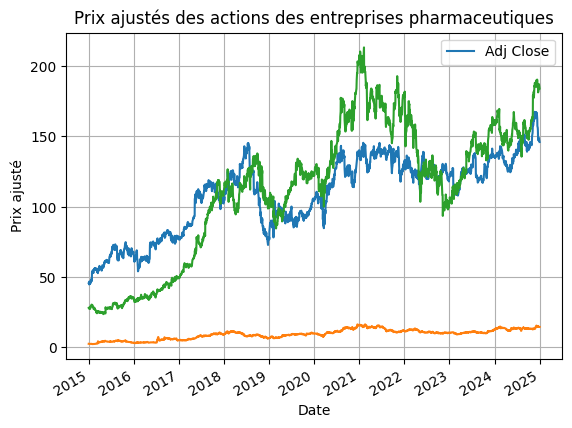

In [ ]:
#importation de la data

# Graphique de l'évolution des prix ajusté de l'actif

plt.figure(figsize=(14,6))
donnees['Adj Close'].plot()  # Vérifie bien le nom de la colonne

plt.title("Prix ajustés des actions des entreprises pharmaceutiques")
plt.xlabel("Date")
plt.ylabel("Prix ajusté")

plt.legend(["Adj Close"])  # Assure-toi que 'Stocks' est bien défini avant sinon remplace-le
plt.grid(True)
plt.show()



NameError: name 'Stocks' is not defined

<Figure size 1200x600 with 0 Axes>

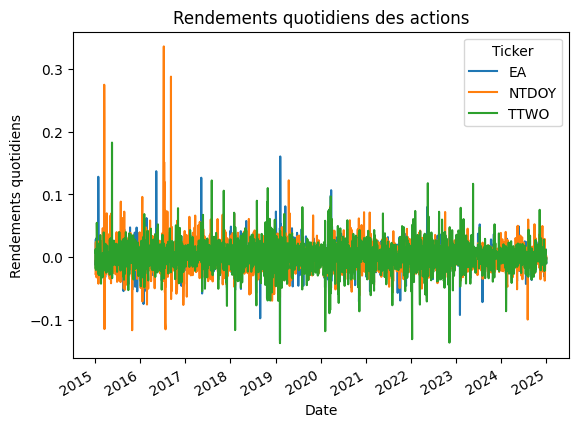

In [ ]:
# Graphique des rendements quotidiens
plt.figure(figsize=(12, 6))
rendements_quotidiens.plot()
plt.title('Rendements quotidiens des actions')
plt.xlabel('Date')
plt.ylabel('Rendements quotidiens')
plt.legend(Stocks)
plt.grid(True)
plt.show()

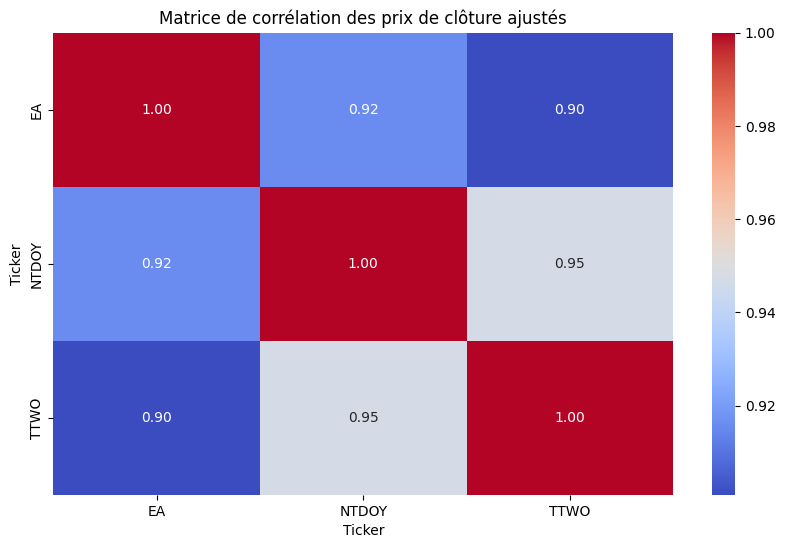

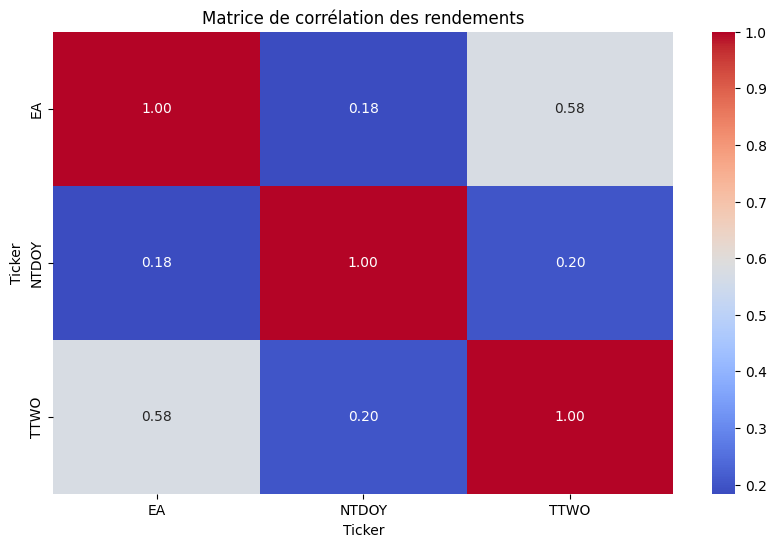

In [ ]:
# Matrice de corrélation des prix de clôture ajustés
plt.figure(figsize=(10, 6))
sns.heatmap(prix_cloture_ajuste.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des prix de clôture ajustés")
plt.show()

# Matrice de corrélation des rendements
plt.figure(figsize=(10, 6))
sns.heatmap(rendements_quotidiens.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des rendements")
plt.show()


In [ ]:
#Comparatifs et ratios financiers

debut_pandemie = '2020-03-01'

donnees_avant = data.loc[data.index < debut_pandemie]
donnees_apres = data.loc[data.index >= debut_pandemie]

rendements_avant = donnees_avant['Adj Close'].pct_change().dropna()
rendements_apres = donnees_apres['Adj Close'].pct_change().dropna()

rendement_annuel_moyen_avant = rendements_avant.mean() * 252
rendement_annuel_moyen_apres = rendements_apres.mean() * 252

print("Rendement annuel moyen avant la pandémie : \n", rendement_annuel_moyen_avant)
print("Rendement annuel moyen après la pandémie : \n", rendement_annuel_moyen_apres)


taux_sans_risque = 0.02  # Exemple : 2% comme taux sans risque

# Calcul de chaque valeur financière avant et après la pandémie

# Calcul des ratios de Sharpe
sharpe_avant = (rendements_avant.mean() * 252 - taux_sans_risque) / (rendements_avant.std() * np.sqrt(252))
sharpe_apres = (rendements_apres.mean() * 252 - taux_sans_risque) / (rendements_apres.std() * np.sqrt(252))

print(f"Ratio de Sharpe avant la pandémie: {sharpe_avant}")
print(f"Ratio de Sharpe après la pandémie: {sharpe_apres}")

# Calcul des rendements cumulés
rendements_cumules_avant = (1 + rendements_avant).cumprod()
rendements_cumules_apres = (1 + rendements_apres).cumprod()

# Calcul du drawdown (perte maximale)
drawdown_avant = (rendements_cumules_avant - maximum_cumule_avant) / maximum_cumule_avant
drawdown_apres = (rendements_cumules_apres - maximum_cumule_apres) / maximum_cumule_apres

drawdown_max_avant = drawdown_avant.min()
drawdown_max_apres = drawdown_apres.min()

print(f"Drawdown maximal avant la pandémie : {drawdown_max_avant}")
print(f"Drawdown maximal après la pandémie : {drawdown_max_apres}")


# Définition de l'indice de marché (S&P 500)
indice_marche = "^GSPC"
donnees_marche = yf.download(indice_marche, start=start_date, end=end_date, auto_adjust=False)

cloture_marche = donnees_marche['Adj Close']
rendements_marche = cloture_marche.pct_change().dropna()

# Séparation des rendements du marché avant et après la pandémie
rendements_marche_avant = rendements_marche.loc[rendements_marche.index < debut_pandemie]
rendements_marche_apres = rendements_marche.loc[rendements_marche.index >= debut_pandemie]

# Création d'un dictionnaire pour stocker Alpha & Beta avant/après
valeurs_alpha_beta = {}

# Calcul Alpha & Beta pour chaque action
for action in Stocks:
    rendements_action_avant = rendements_avant[action].dropna()
    rendements_action_apres = rendements_apres[action].dropna()

    # Alignement des données et suppression des valeurs NaN
    aligne_avant = pd.concat([rendements_marche_avant, rendements_action_avant], axis=1, join='inner').dropna()
    aligne_apres = pd.concat([rendements_marche_apres, rendements_action_apres], axis=1, join='inner').dropna()

    # Vérification que les séries ne sont pas vides
    if aligne_avant.shape[0] > 0:
        pente_avant, intercept_avant, _, _, _ = linregress(aligne_avant.iloc[:, 0], aligne_avant.iloc[:, 1])
    else:
        pente_avant, intercept_avant = np.nan, np.nan

    if aligne_apres.shape[0] > 0:
        pente_apres, intercept_apres, _, _, _ = linregress(aligne_apres.iloc[:, 0], aligne_apres.iloc[:, 1])
    else:
        pente_apres, intercept_apres = np.nan, np.nan

    valeurs_alpha_beta[action] = {
        "Alpha Avant COVID": intercept_avant,
        "Beta Avant COVID": pente_avant,
        "Alpha Après COVID": intercept_apres,
        "Beta Après COVID": pente_apres
    }

# Conversion en DataFrame pour affichage
alpha_beta_df = pd.DataFrame(valeurs_alpha_beta).T
display(alpha_beta_df)

# Ajout des valeurs Alpha et Beta au tableau final
performance["Alpha Avant COVID"] = alpha_beta_df["Alpha Avant COVID"]
performance["Beta Avant COVID"] = alpha_beta_df["Beta Avant COVID"]
performance["Alpha Après COVID"] = alpha_beta_df["Alpha Après COVID"]
performance["Beta Après COVID"] = alpha_beta_df["Beta Après COVID"]

# Affichage du tableau final
display(performance)

NameError: name 'data' is not defined

In [ ]:
import pandas as pd  # Ajout de l'importation de pandas

# Création d’un tableau DataFrame récapitulatif
performance = pd.DataFrame({
    "Rendement Annuel Moyen Avant Pandémie": rendement_annuel_moyen_avant,
    "Rendement Annuel Moyen Après Pandémie": rendement_annuel_moyen_apres,
    "Volatilité Avant Pandémie": rendements_avant.std() * np.sqrt(252),
    "Volatilité Après Pandémie": rendements_apres.std() * np.sqrt(252),
    "Ratio de Sharpe Avant Pandémie": sharpe_avant,
    "Ratio de Sharpe Après Pandémie": sharpe_apres,
    "Drawdown Maximum Avant Pandémie": drawdown_max_avant,
    "Drawdown Maximum Après Pandémie": drawdown_max_apres,
    "Alpha Avant Pandémie": alpha_beta_df["Alpha Avant COVID"],
    "Alpha Après Pandémie": alpha_beta_df["Alpha Après COVID"],
    "Beta Avant Pandémie": alpha_beta_df["Beta Avant COVID"],
    "Beta Après Pandémie": alpha_beta_df["Beta Après COVID"]
})

display(performance)


NameError: name 'rendement_annuel_moyen_avant' is not defined